In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats

from sklearn.preprocessing import MinMaxScaler




In [252]:
data = pd.read_csv("./dataset/train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [253]:
data.shape

(614, 13)

<AxesSubplot:ylabel='None'>

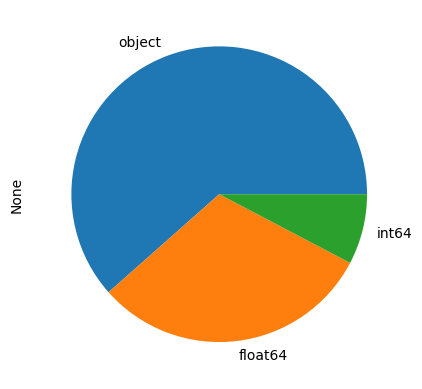

In [254]:
data.dtypes.value_counts().plot.pie()

<AxesSubplot:>

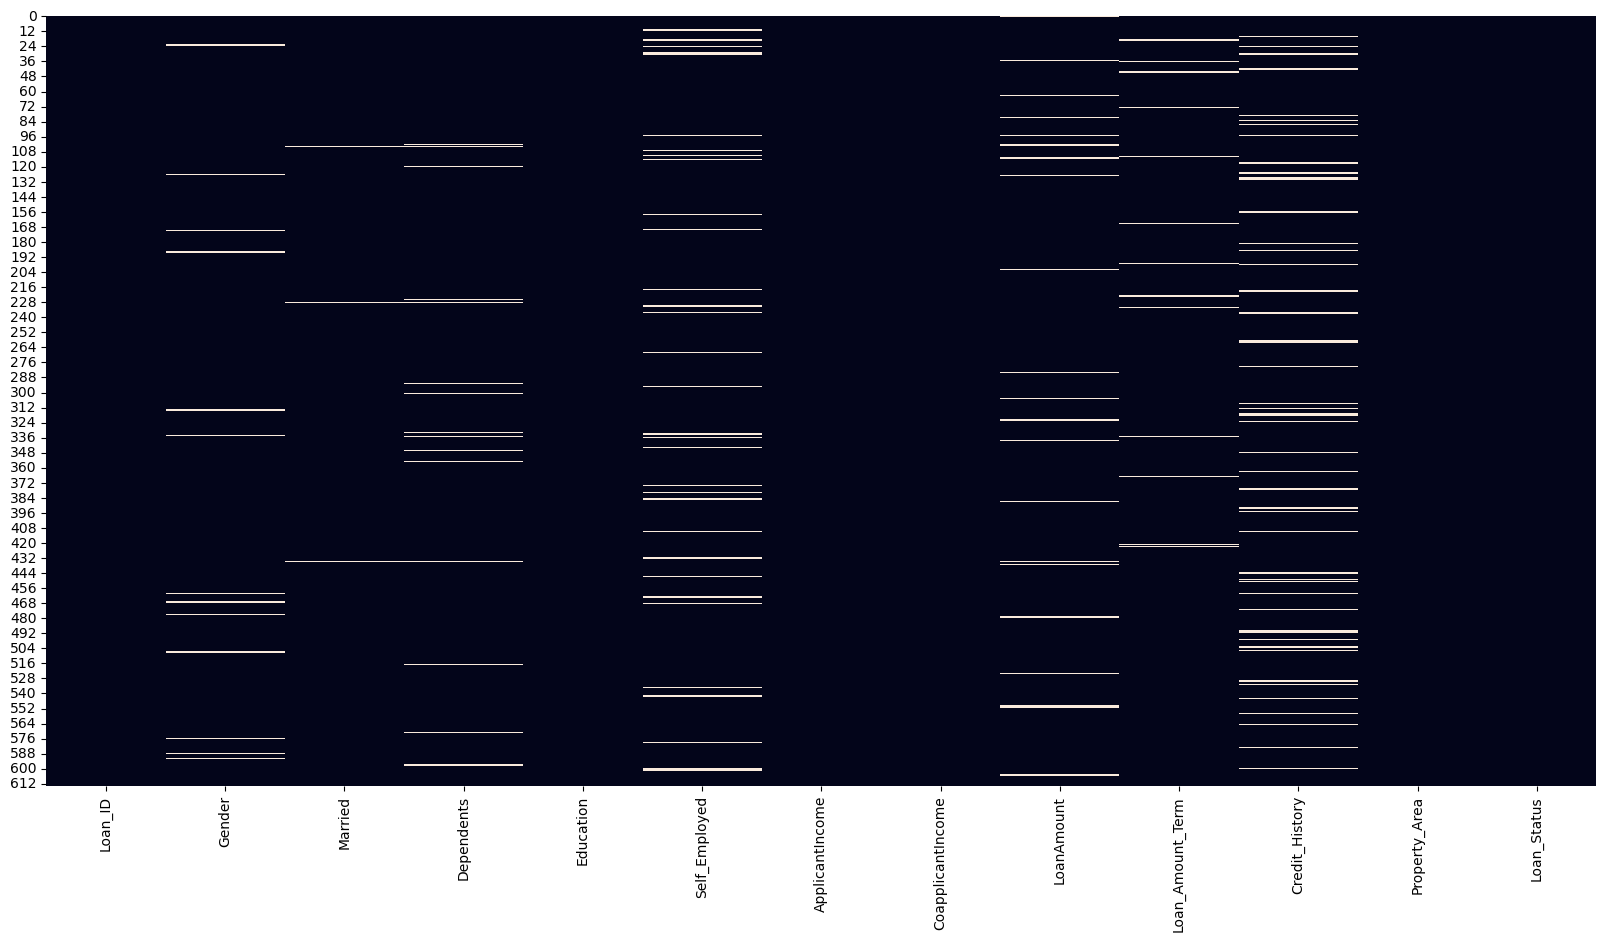

In [255]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

# EXPLORATION 

In [256]:
# Clean 
df=data.copy()
df= df.drop('Loan_ID' ,axis=1 )
#df =Format(data)

In [257]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Gender-------------------------------------------- ['Male' 'Female' nan]
Married------------------------------------------- ['No' 'Yes' nan]
Dependents---------------------------------------- ['0' '1' '2' '3+' nan]
Education----------------------------------------- ['Graduate' 'Not Graduate']
Self_Employed------------------------------------- ['No' 'Yes' nan]
Property_Area------------------------------------- ['Urban' 'Rural' 'Semiurban']
Loan_Status--------------------------------------- ['Y' 'N']


In [258]:

# Liste des variables de type 'object'
object_vars = df.select_dtypes(include='object').columns.tolist()

# Calculer le pourcentage de chaque valeur pour chaque variable de type 'object'
for var in object_vars:
    print(f"   \n\n{'' :-<50}\n {var}\n" , df[var].value_counts(normalize=True))

   

--------------------------------------------------
 Gender
 Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
   

--------------------------------------------------
 Married
 Yes    0.651391
No     0.348609
Name: Married, dtype: float64
   

--------------------------------------------------
 Dependents
 0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64
   

--------------------------------------------------
 Education
 Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
   

--------------------------------------------------
 Self_Employed
 No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
   

--------------------------------------------------
 Property_Area
 Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
   

--------------------------------------------------
 Loan_Status
 Y    0.687296
N    0.312704
Name: Loan_Statu

In [259]:
for col in df :
    print(f'{col :-<50} {df[col].isna().sum() / df[col].shape }')

Gender-------------------------------------------- [0.02117264]
Married------------------------------------------- [0.00488599]
Dependents---------------------------------------- [0.02442997]
Education----------------------------------------- [0.]
Self_Employed------------------------------------- [0.05211726]
ApplicantIncome----------------------------------- [0.]
CoapplicantIncome--------------------------------- [0.]
LoanAmount---------------------------------------- [0.03583062]
Loan_Amount_Term---------------------------------- [0.0228013]
Credit_History------------------------------------ [0.08143322]
Property_Area------------------------------------- [0.]
Loan_Status--------------------------------------- [0.]


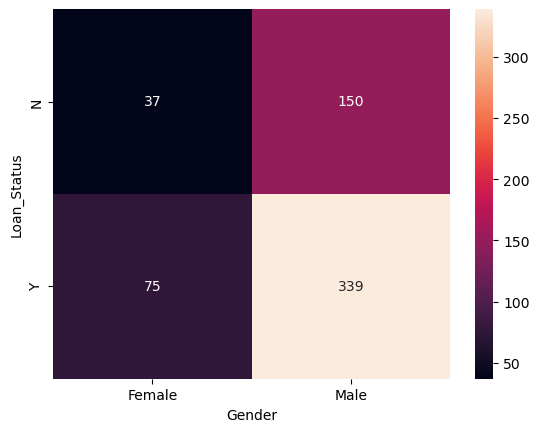

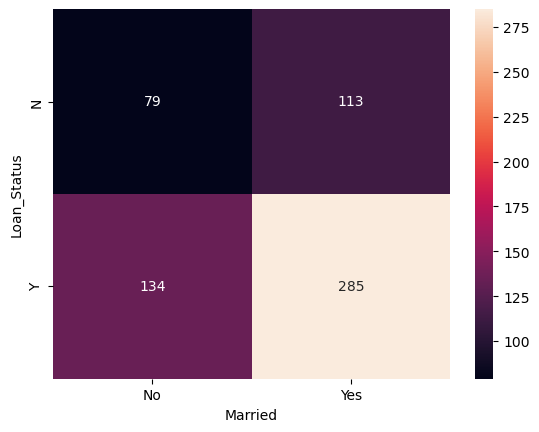

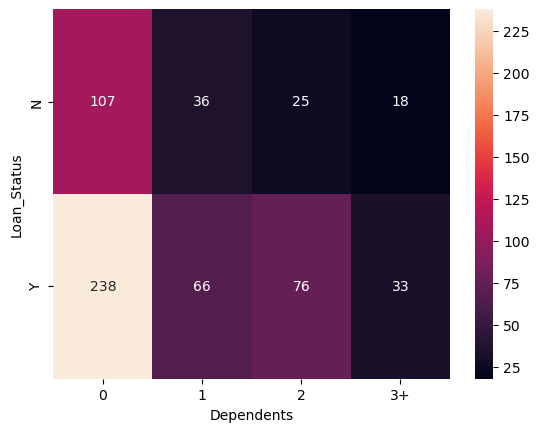

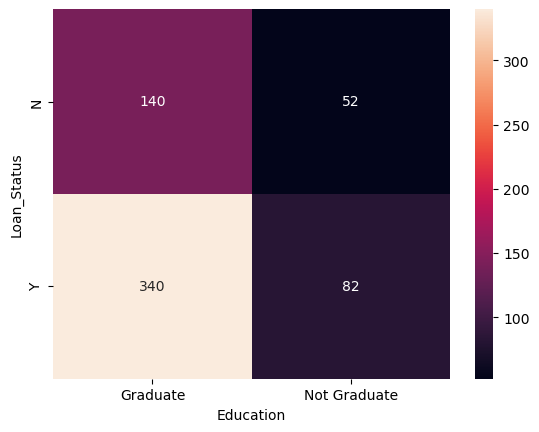

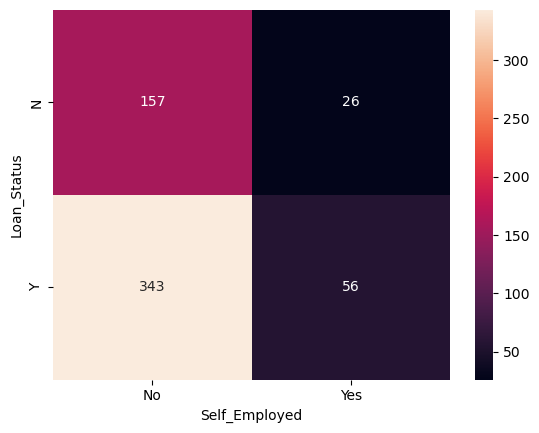

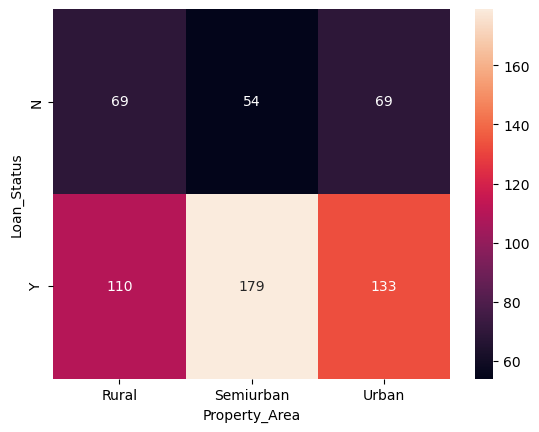

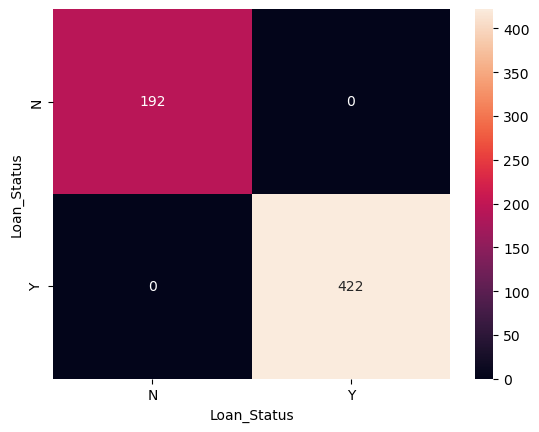

In [260]:
for col in df.select_dtypes(include='object').columns.tolist():
    plt.figure()
    sns.heatmap(pd.crosstab(df["Loan_Status"], df[col]), annot=True, fmt='d')

In [261]:
df_without_isNan= df .dropna()
float_numerical_col = df.select_dtypes('float64') .columns.tolist()
int_numerical_col = df.select_dtypes('int') .columns.tolist()
combined_array = np.concatenate((float_numerical_col, int_numerical_col), axis=0)




print("mean:")
for col in  combined_array:
    print(f'{col :-<50} { np.mean (df_without_isNan[col]  )}')


 
print(f' \n\n {"" :-<75} \n\n ')
print("mean without aberant value:")
for col in combined_array:
    trimmed_data = mstats.winsorize(df_without_isNan[col], limits=[0.05, 0.05]) # supprimer les valeurs aberrantes
    print(f'{col :-<50} {np.mean(trimmed_data):.2f}')



print(f' \n\n {"" :-<75} \n\n ')
print("MAX:") 
for col in  combined_array:
    print(f'{col :-<50} { np.max(df_without_isNan[col]  )}')
    
 

print(f' \n\n {"" :-<75} \n\n ')
print("Minimum:") 
for col in  combined_array:
    print(f'{col :-<50} { np.min(df_without_isNan[col]  )}')
    
    
    

mean:
CoapplicantIncome--------------------------------- 1581.0935833096667
LoanAmount---------------------------------------- 144.73541666666668
Loan_Amount_Term---------------------------------- 342.05
Credit_History------------------------------------ 0.8541666666666666
ApplicantIncome----------------------------------- 5364.23125
 

 --------------------------------------------------------------------------- 

 
mean without aberant value:
CoapplicantIncome--------------------------------- 1373.31
LoanAmount---------------------------------------- 139.82
Loan_Amount_Term---------------------------------- 341.12
Credit_History------------------------------------ 0.85
ApplicantIncome----------------------------------- 4968.49
 

 --------------------------------------------------------------------------- 

 
MAX:
CoapplicantIncome--------------------------------- 33837.0
LoanAmount---------------------------------------- 600.0
Loan_Amount_Term---------------------------------- 480.0


In [262]:

for col in  combined_array:
    print(f'{col :-<50} { df_without_isNan[col].describe()   }')
    
 

CoapplicantIncome--------------------------------- count      480.000000
mean      1581.093583
std       2617.692267
min          0.000000
25%          0.000000
50%       1084.500000
75%       2253.250000
max      33837.000000
Name: CoapplicantIncome, dtype: float64
LoanAmount---------------------------------------- count    480.000000
mean     144.735417
std       80.508164
min        9.000000
25%      100.000000
50%      128.000000
75%      170.000000
max      600.000000
Name: LoanAmount, dtype: float64
Loan_Amount_Term---------------------------------- count    480.000000
mean     342.050000
std       65.212401
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64
Credit_History------------------------------------ count    480.000000
mean       0.854167
std        0.353307
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype:

c:\Users\cbs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\cbs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\cbs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

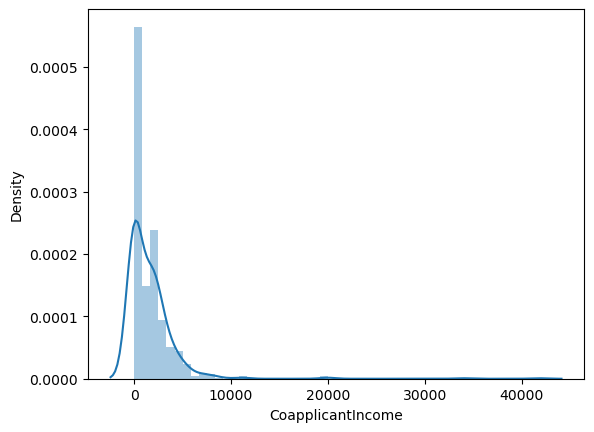

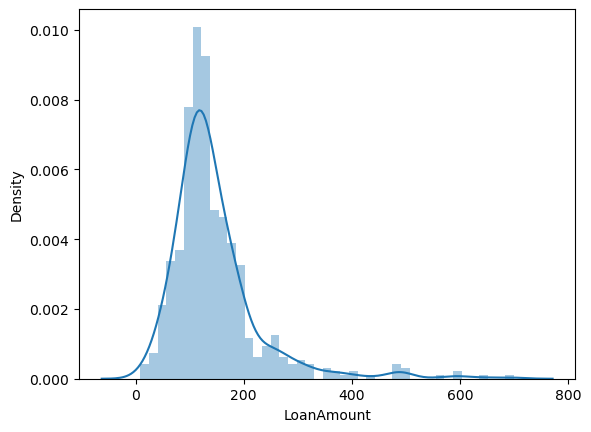

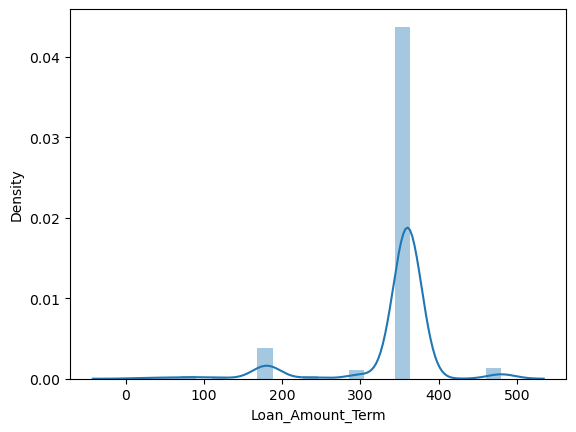

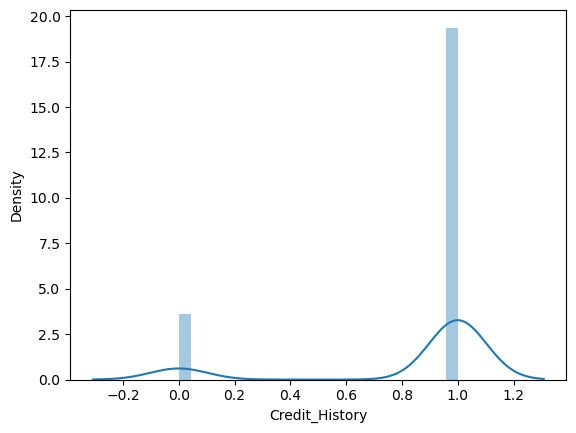

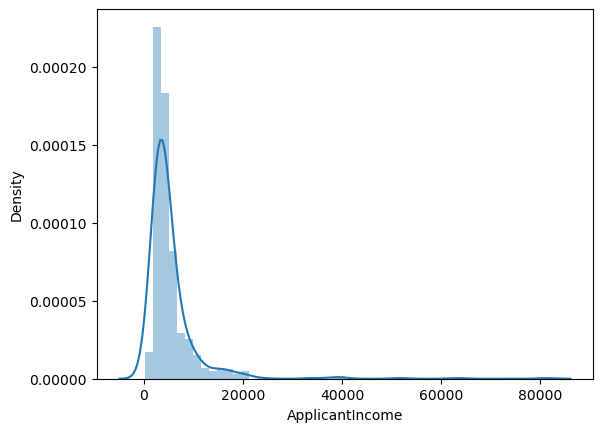

In [263]:
for col in  combined_array:
    plt.figure()
    sns.distplot(df[col])

# FORMATING

In [264]:
def encoding(data):
    #data= data.drop('Loan_ID' ,axis=1 )
    column_format = {
        "Gender":  {'Male': 1, 'Female': 0 },
        "Married" :   {'Yes': 1, 'No': 0 },
        "Dependents":  { "0": 0, "1" :1 , "3+":3 }  ,
        "Education":  {  'Graduate':1 , 'Not Graduate':0 },
        "Self_Employed":  {'Yes': 1, 'No': 0 },
        "Property_Area":  { 'Urban':1, 'Rural':2, 'Semiurban' :3 },
        "Loan_Status":  {'Y': 1, 'N': 0 },
    }
    for col in column_format:
        data[col] = data[col].map(column_format[col]).fillna(-1)
    
    return data 

In [265]:
df_loan_positive= df.dropna() 
df_loan_positive = df_loan_positive.loc[df["Loan_Status"] == "Y"]


def lifetime_income_per_member(data):
     data["lifetime_income_per_member"] = round((data["CoapplicantIncome"] + data["ApplicantIncome"]) / (1+data["Married"] + data['Dependents'] ))
     return  data

In [266]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

def normalize(df, method='min-max'):
    """
    Normalize a pandas DataFrame using min-max normalization or z-score normalization.

    Parameters:
        df (pandas.DataFrame): The DataFrame to be normalized.
        method (str): The normalization method to be used, either 'min-max' (default) or 'z-score'.

    Returns:
        pandas.DataFrame: The normalized DataFrame.
    """
    # Replace infinite values with NaN
    df = df.replace([np.inf, -np.inf], np.nan)

    # Normalize the numerical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    if method == 'min-max':
        # Use min-max normalization for columns with a large range
        scaler = MinMaxScaler()
    elif method == 'z-score':
        # Use z-score normalization for columns with a smaller range and outliers
        scaler = StandardScaler()
    else:
        raise ValueError("Invalid normalization method. Choose either 'min-max' or 'z-score'.")

    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # Replace NaN values with 0
    df = df.fillna(0)

    return df

In [267]:

df= df.dropna(axis=0)
df=  encoding(df)
df =lifetime_income_per_member(df)
df = normalize(df)

df.head()
df.shape


(480, 13)

# TESTING MODEL 

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix


In [269]:

# Split the dataset into X and y
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [270]:

# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {'max_depth': [2], 'min_samples_leaf': [1], 'min_samples_split': [2], 'n_estimators': [1]
}

# Perform the grid search
rf_grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', rf_grid_search.best_params_)
print('Best score:', rf_grid_search.best_score_)

Best hyperparameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1}
Best score: 0.8306220095693779


In [271]:

# Create an instance of LogisticRegression
logistic_regression = LogisticRegression()

# Define the hyperparameter grid
hyperparameters = {'C':  [1], 'penalty':  ['l1', 'l2' ]  ,'penalty': ['l2' ] }  

# Perform grid search to find the best hyperparameters
lr_grid_search = GridSearchCV(logistic_regression, hyperparameters,  cv=5  , error_score='raise')
lr_grid_search.fit(X_train, y_train)




# BEST PARAMS 

print('Best hyperparameters:',  lr_grid_search.best_estimator_)
print('Best score:', lr_grid_search.best_score_)




Best hyperparameters: LogisticRegression(C=1)
Best score: 0.825427204374573


In [272]:

# Define the DecisionTreeClassifier and GridSearchCV
dtc = DecisionTreeClassifier()

parameters =   {   'max_depth': [1], 'min_samples_leaf': [1], 'min_samples_split': [2]}
              
dtc_grid_search = GridSearchCV(dtc, parameters, cv=5 , error_score='raise' )

# Fit the DecisionTreeClassifier with GridSearchCV
dtc_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding cross-validation score
print('best_params_' , dtc_grid_search.best_params_)
print('best_score_' , dtc_grid_search.best_score_)


best_params_ {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
best_score_ 0.825427204374573


In [273]:
# Define the possible values of the hyperparameters
parameters = {'C': [0.1 , 1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}


# Create the SVM model
svm_model = SVC()

# Use GridSearchCV to find the best hyperparameters
svc_grid_search = GridSearchCV(svm_model, parameters, scoring='accuracy', cv=5)
svc_grid_search.fit(X_train, y_train)


# Print the best hyperparameters and the corresponding cross-validation score
print('best_params_' , svc_grid_search.best_params_)
print('best_score_' , svc_grid_search.best_score_)


best_params_ {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
best_score_ 0.825427204374573


In [274]:
#dtc_grid_search.get_params()

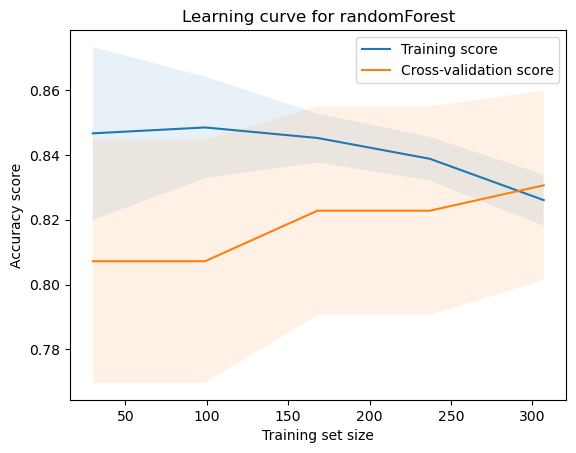

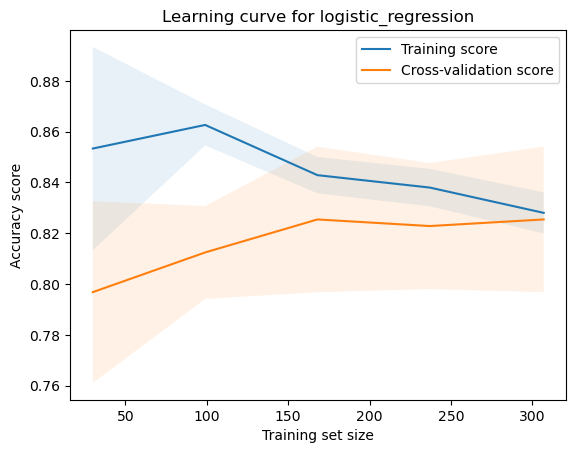

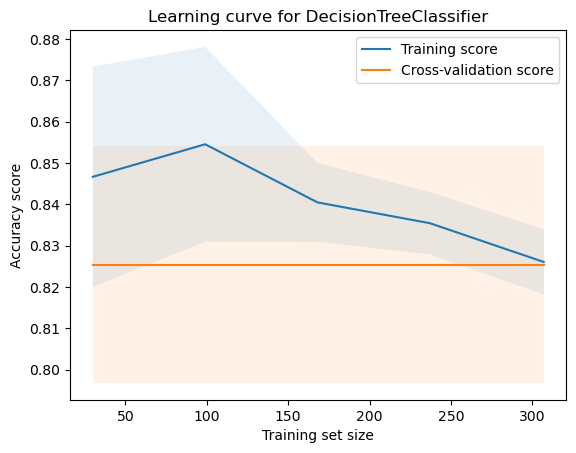

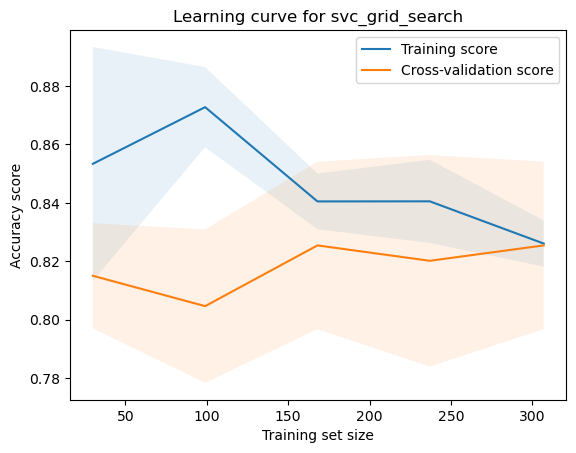

In [275]:

algos = [{'name': "randomForest", 'model': rf_grid_search} ,  {'name': "logistic_regression", 'model': lr_grid_search} ,  {'name': "DecisionTreeClassifier", 'model': dtc_grid_search} ,  {'name': "svc_grid_search", 'model': svc_grid_search }   ]

for algo in algos:
    # Extract the algorithm and its name from the dictionary
    model = algo['model']
    algo_name = algo['name']
    
    # Calculate the learning curves
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

    # Calculate the mean and standard deviation of the training and testing scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curves
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.xlabel('Training set size')
    plt.ylabel('Accuracy score')
    plt.title('Learning curve for {}'.format(algo_name))
    plt.legend()
    plt.show()

# BAgging 

In [276]:
from sklearn.ensemble import BaggingClassifier
 


In [277]:
# ! Best hyperparameters: {'max_features': 0.9, 'max_samples': 0.6, 'n_estimators': 91}



# Define the parameter grid for GridSearchCV
param_grid = {'n_estimators':  [94],
              'max_samples':    [ 0.2 ],
              'max_features':    [ 0.6],
              
               
              
              }

# Create the base estimator
base_estimator = SVC()

# Create the bagging classifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=5 ,error_score='raise' )
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best best_Score:", grid_search.best_score_)


Best hyperparameters: {'max_features': 0.6, 'max_samples': 0.2, 'n_estimators': 94}
Best best_Score: 0.8202323991797676


Nombre d'estimations vraies :  71
Nombre d'estimations fausses :  25


Text(0.5, 1.0, 'Matrice de confusion')

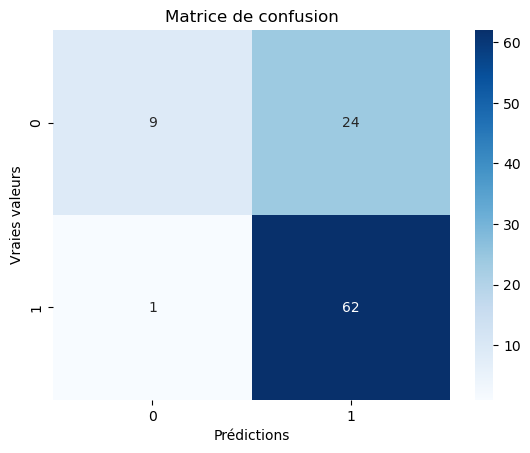

In [278]:

# Obtenir la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher le nombre d'estimations vraies et fausses
print("Nombre d'estimations vraies : ", cm[0][0] + cm[1][1])
print("Nombre d'estimations fausses : ", cm[0][1] + cm[1][0])

# Dessiner la matrice de confusion sous forme de heatmap avec seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')

# BOOSTING

In [279]:
from sklearn.ensemble import AdaBoostClassifier



In [280]:


# !  hyperparameters: {'base_estimator__max_depth': 1, 'learning_rate': 0.2, 'n_estimators': 1}
# Define the parameter grid for GridSearchCV
param_grid = {'n_estimators':  [1],
              'learning_rate': [0.1  ],
              'base_estimator__max_depth':  [1]}

# Create the base estimator
base_estimator =  DecisionTreeClassifier()

# Create the AdaBoost classifier
ada_classifier = AdaBoostClassifier(base_estimator=base_estimator)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ada_classifier, param_grid, cv=5 ,error_score='raise' )
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best best_score_:", grid_search.best_score_)

# Use the best estimator to predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

Best hyperparameters: {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 1}
Best best_score_: 0.825427204374573


Nombre d'estimations vraies :  71
Nombre d'estimations fausses :  25


Text(0.5, 1.0, 'Matrice de confusion')

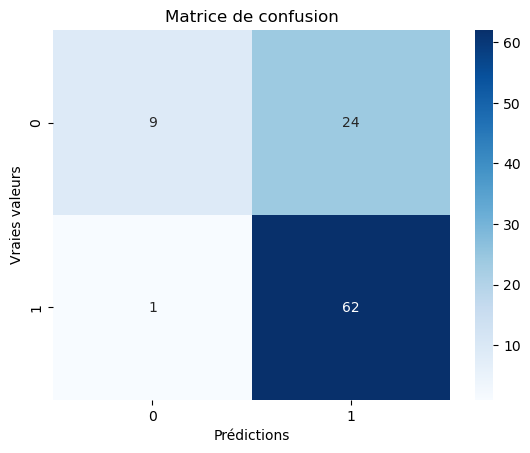

In [281]:

# Obtenir la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher le nombre d'estimations vraies et fausses
print("Nombre d'estimations vraies : ", cm[0][0] + cm[1][1])
print("Nombre d'estimations fausses : ", cm[0][1] + cm[1][0])

# Dessiner la matrice de confusion sous forme de heatmap avec seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')

# Stacking

In [282]:

from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [283]:

# Initialiser les modèles à empiler
estimators = [('lr', LogisticRegression()), ('svc', SVC()), ('dt', DecisionTreeClassifier())]

# Initialiser le modèle de stacking avec les modèles et le classifieur final
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())


# Définir les hyperparamètres pour le GridSearchCV
params = {
    'dt__criterion':[ 'entropy'],
    'dt__max_depth': [6],
    'final_estimator__C': [13],
    'final_estimator__penalty':[ 'l2'],
    'svc__C': [ 7,28],
    'svc__kernel': ['rbf']
    
}

# Initialiser GridSearchCV avec le modèle de stacking et les hyperparamètres
grid = GridSearchCV(stack_model, params, cv=5, scoring='accuracy'  ,error_score='raise' )

# Ajuster GridSearchCV avec les données d'entraînement
grid.fit(X_train, y_train)


# Afficher les meilleurs hyperparamètres et le score associé
print("Meilleurs hyperparamètres : ", grid.best_params_)
print("Meilleur score : ", grid.best_score_)

# Prédire les classes de l'ensemble de test
y_pred = grid.predict(X_test)



Meilleurs hyperparamètres :  {'dt__criterion': 'entropy', 'dt__max_depth': 6, 'final_estimator__C': 13, 'final_estimator__penalty': 'l2', 'svc__C': 28, 'svc__kernel': 'rbf'}
Meilleur score :  0.8228298017771702


Nombre d'estimations vraies :  71
Nombre d'estimations fausses :  25


Text(0.5, 1.0, 'Matrice de confusion')

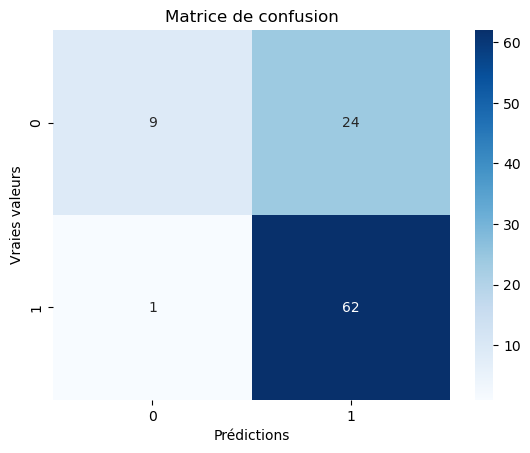

In [284]:

# Obtenir la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher le nombre d'estimations vraies et fausses
print("Nombre d'estimations vraies : ", cm[0][0] + cm[1][1])
print("Nombre d'estimations fausses : ", cm[0][1] + cm[1][0])

# Dessiner la matrice de confusion sous forme de heatmap avec seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')